# Overview of the data

In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd
import scipy.stats as stats

In [52]:
df_b = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Data analytics files\bloodtypes.csv")
df_b

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579,34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,43576691,40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,45479118,48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,3021324,29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,25466459,38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
...,...,...,...,...,...,...,...,...,...,...
121,Venezuela,28644603,58.30,28.20,5.60,1.90,3.70,1.80,0.40,0.10
122,Vietnam,98721275,41.70,21.90,30.80,4.98,0.30,0.10,0.20,0.02
123,Yemen,29884405,47.84,27.50,15.32,2.14,3.66,2.10,1.17,0.16
124,Zimbabwe,14546314,63.30,18.50,14.60,0.99,1.70,0.50,0.40,0.01


In [53]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     126 non-null    object 
 1   Population  126 non-null    int64  
 2   O+          126 non-null    float64
 3   A+          126 non-null    float64
 4   B+          126 non-null    float64
 5   AB+         126 non-null    float64
 6   O-          125 non-null    float64
 7   A-          125 non-null    float64
 8   B-          125 non-null    float64
 9   AB-         125 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.0+ KB


# data cleaning | preparation

In [54]:
#Checking for missing values 
df_b.isnull().sum()
df_b[df_b.isnull().any(axis=1)]
df_b = df_b.fillna(0)

In [55]:
#Summary statistics
summar_stats = df_b[['O+', 'A+', 'B+', 'AB+','O-','A-','B-','AB-']].describe()

print("Summary Statistics for Blood types percentages:")
summar_stats

Summary Statistics for Blood types percentages:


,O+,A+,B+,AB+,O-,A-,B-,AB-
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,40.351190,29.665079,16.403413,4.827143,3.885635,3.251190,1.323810,0.492381
std,9.991809,6.351653,7.564090,2.543609,2.545848,2.511485,0.866533,0.382975
min,25.500000,14.000000,4.720000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,32.075000,25.817500,10.000000,2.925000,1.722500,1.000000,0.510000,0.135000
50%,38.175000,30.000000,15.000000,4.295000,3.950000,2.700000,1.225000,0.400000
75%,46.822500,34.850000,21.235000,6.300000,6.000000,6.000000,2.000000,0.907500
max,75.000000,46.300000,36.800000,14.700000,13.000000,8.000000,3.130000,1.200000


# EDA and EDA visualizations

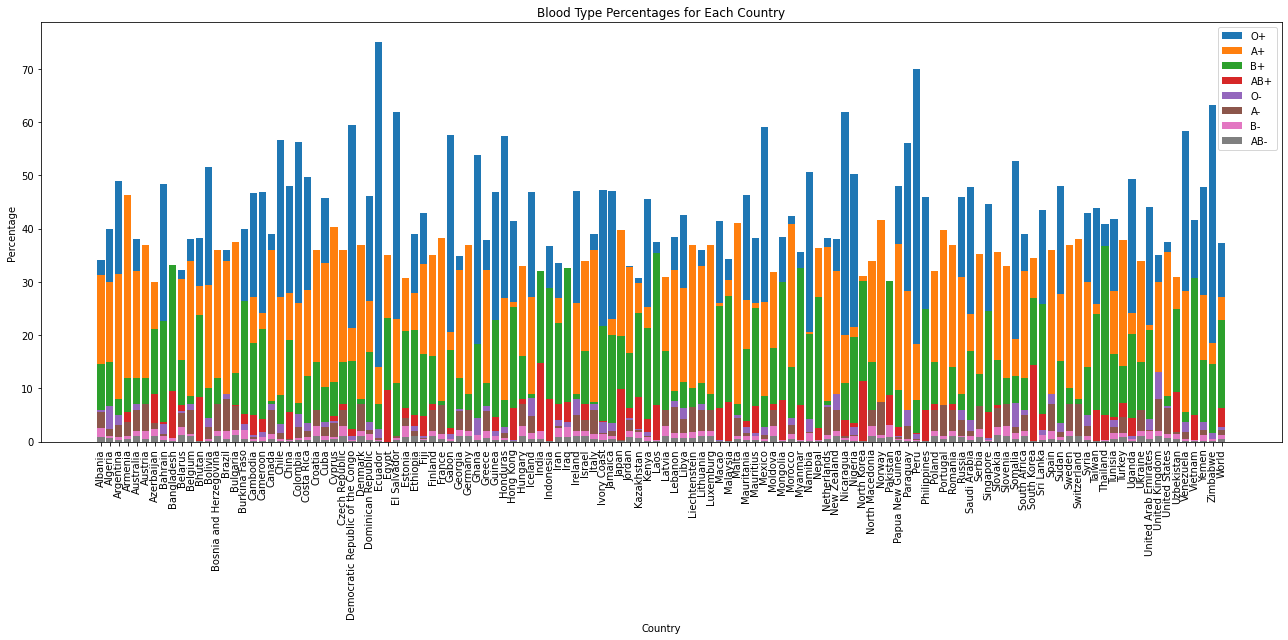

In [56]:
blood_type_columns = ['O+', 'A+', 'B+', 'AB+','O-','A-','B-','AB-']

# Plotting bar plot for each blood type percentage
plt.figure(figsize=(18, 9))
for blood_type in blood_type_columns:
    plt.bar(df_b['Country'], df_b[blood_type], label=blood_type)

plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Blood Type Percentages for Each Country')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

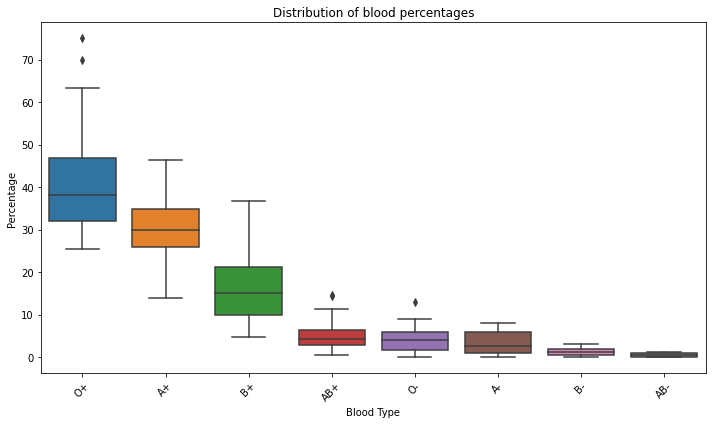

In [57]:
df_melted = df_b.melt(id_vars="Country",value_vars=blood_type_columns,var_name="BloodType",value_name="Percentage")

plt.figure(figsize=(10,6))
sns.boxplot(x="BloodType",y="Percentage",data=df_melted)
plt.xlabel("Blood Type")
plt.ylabel("Percentage")
plt.title("Distribution of blood percentages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
df_melted

,Country,BloodType,Percentage
0,Albania,O+,34.10
1,Algeria,O+,40.00
2,Argentina,O+,48.90
3,Armenia,O+,29.00
4,Australia,O+,38.00
...,...,...,...
1003,Venezuela,AB-,0.10
1004,Vietnam,AB-,0.02
1005,Yemen,AB-,0.16
1006,Zimbabwe,AB-,0.01


C:\Users\dell\AppData\Local\Temp/ipykernel_7472/3327056205.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 2592x1296 with 0 Axes>

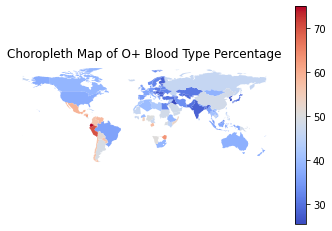

In [59]:
df_b['Country'] = df_b['Country'].replace('United States', 'United States of America')

# Load a world shapefile for mapping
world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Merge the shapefile with DataFrame on the 'Country' column
merged_df = world_shapefile.merge(df_b, left_on='name', right_on='Country', how='left')

# Plot the choropleth map
plt.figure(figsize=(36, 18))
merged_df.plot(column='O+', cmap='coolwarm', legend=True)
plt.title('Choropleth Map of O+ Blood Type Percentage')
plt.axis('off')
plt.show()

In [60]:
grouped_df = merged_df.groupby("continent")[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].mean()

print("Grouped and Aggregated Dataframe :")
grouped_df

Grouped and Aggregated Dataframe :


,O+,A+,B+,AB+,O-,A-,B-,AB-
continent,,,,,,,,
Africa,46.392000,25.567000,17.970000,3.931000,3.421500,1.784000,1.131000,0.329500
Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Asia,36.155278,28.690556,23.384167,6.929444,2.081389,1.734722,1.033611,0.358056
Europe,33.818235,34.275882,11.811765,4.661765,6.243529,6.203529,2.094118,0.875000
North America,51.054444,28.103333,10.781111,2.670000,3.503333,2.656667,0.911111,0.320000
Oceania,41.750000,33.625000,11.775000,3.650000,4.500000,3.375000,1.225000,0.600000
Seven seas (open ocean),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South America,56.524444,26.353333,7.487778,1.650000,4.453333,2.687778,0.666667,0.175556


In [61]:
grouped_df1 = merged_df.groupby("continent")[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].median()

print("Grouped and Aggregated Dataframe :")
grouped_df1

Grouped and Aggregated Dataframe :


,O+,A+,B+,AB+,O-,A-,B-,AB-
continent,,,,,,,,
Africa,46.565,24.675,17.885,4.1,3.18,1.655,1.075,0.200
Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Asia,35.210,27.750,24.050,6.9,1.84,1.200,0.935,0.215
Europe,32.750,34.500,11.500,4.6,6.00,6.000,2.000,1.000
North America,49.700,27.000,10.200,2.9,3.40,1.900,0.900,0.300
Oceania,40.500,32.650,10.800,3.5,4.00,3.400,1.250,0.600
Seven seas (open ocean),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South America,56.300,28.200,7.800,1.6,4.39,2.700,0.490,0.130


<Figure size 864x432 with 0 Axes>

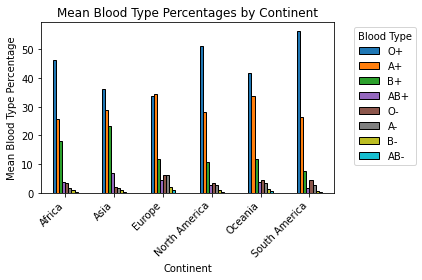

In [62]:
#Drop rows corresponding to 'Antarctica' and 'Seven seas (open ocean)'
grouped_df.drop(['Antarctica', 'Seven seas (open ocean)'], inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 6))
grouped_df.plot(kind='bar', cmap='tab10', edgecolor='black')
plt.title('Mean Blood Type Percentages by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean Blood Type Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Blood Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

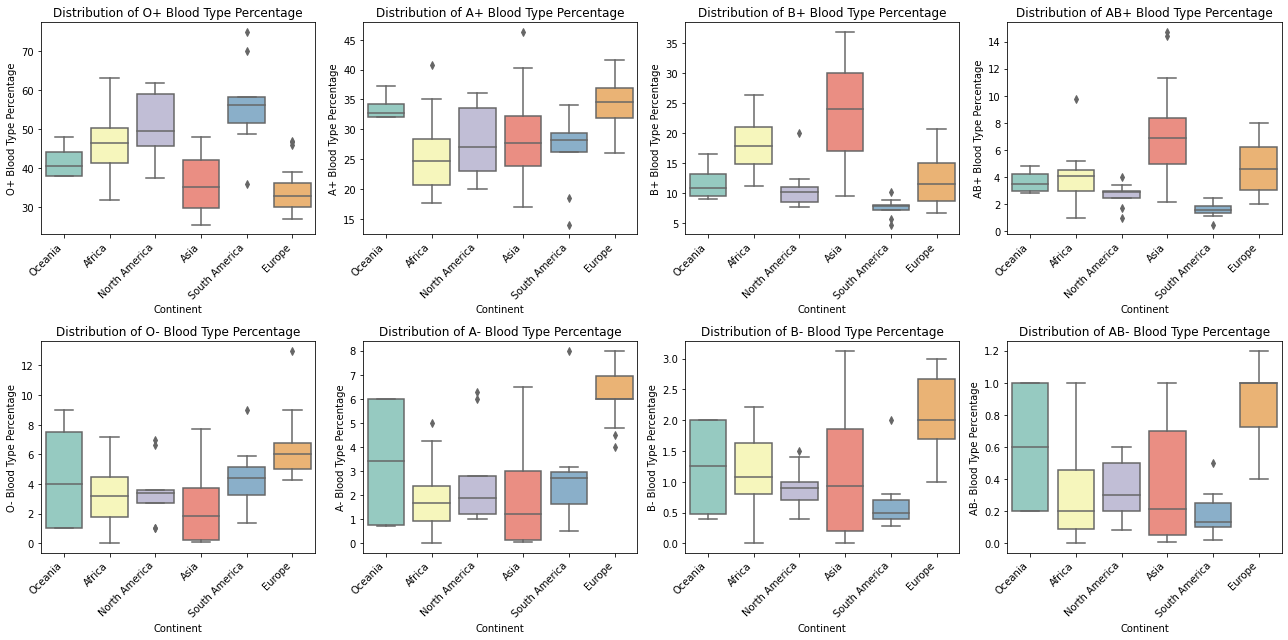

In [63]:
merged_df = merged_df[~merged_df['continent'].isin(['Antarctica', 'Seven seas (open ocean)'])]


blood_type_cols = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']
plt.figure(figsize=(18, 9))

for i, blood_type in enumerate(blood_type_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=merged_df, x='continent', y=blood_type, palette='Set3', fliersize=5)
    plt.title(f'Distribution of {blood_type} Blood Type Percentage')
    plt.xlabel('Continent')
    plt.ylabel(f'{blood_type} Blood Type Percentage')
    plt.tight_layout()

    plt.xticks(rotation=45, ha='right')

plt.show()

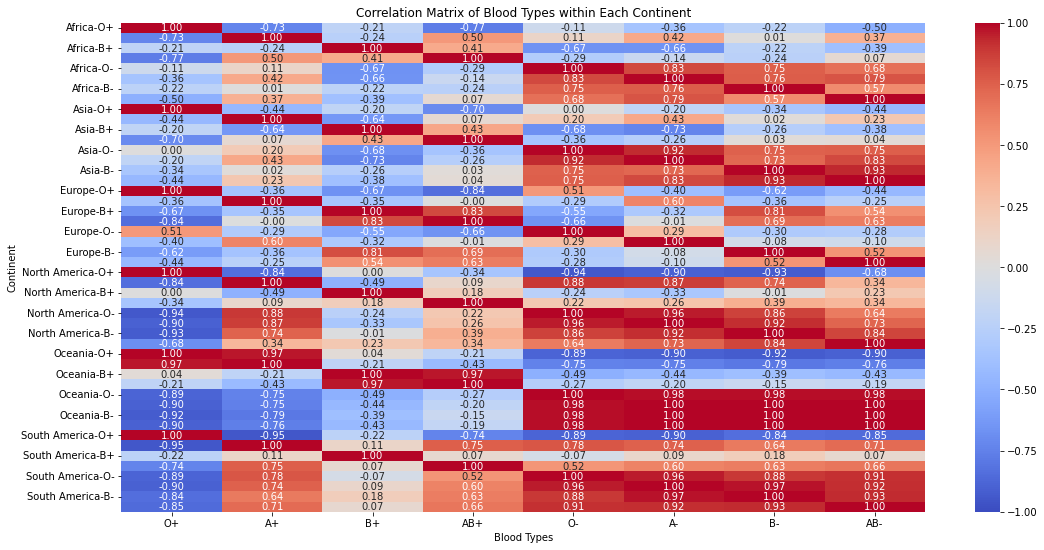

In [64]:
correlation_matrix = merged_df.groupby('continent')[blood_type_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 9
                   ))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Blood Types within Each Continent')
plt.xlabel('Blood Types')
plt.ylabel('Continent')
plt.show()

In [65]:
# Calculate the global mean blood type percentages for each blood type
mean_blood_type_cols = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']
global_mean_blood_type_percentages = df_b[mean_blood_type_cols].mean()

# Calculate the percentage difference for each continent
for continent in merged_df['continent'].unique():
    print(f"\nContinent: {continent}")
    for blood_type in mean_blood_type_cols:
        continent_mean = merged_df[merged_df['continent'] == continent][blood_type].mean()
        percentage_difference = ((continent_mean - global_mean_blood_type_percentages[blood_type]) / global_mean_blood_type_percentages[blood_type]) * 100
        print(f"Percentage Difference for {blood_type}: {percentage_difference:.2f}%")


Continent: Oceania
Percentage Difference for O+: 3.47%
Percentage Difference for A+: 13.35%
Percentage Difference for B+: -28.22%
Percentage Difference for AB+: -24.39%
Percentage Difference for O-: 15.81%
Percentage Difference for A-: 3.81%
Percentage Difference for B-: -7.46%
Percentage Difference for AB-: 21.86%

Continent: Africa
Percentage Difference for O+: 14.97%
Percentage Difference for A+: -13.81%
Percentage Difference for B+: 9.55%
Percentage Difference for AB+: -18.56%
Percentage Difference for O-: -11.94%
Percentage Difference for A-: -45.13%
Percentage Difference for B-: -14.56%
Percentage Difference for AB-: -33.08%

Continent: North America
Percentage Difference for O+: 26.53%
Percentage Difference for A+: -5.26%
Percentage Difference for B+: -34.28%
Percentage Difference for AB+: -44.69%
Percentage Difference for O-: -9.84%
Percentage Difference for A-: -18.29%
Percentage Difference for B-: -31.18%
Percentage Difference for AB-: -35.01%

Continent: Asia
Percentage Dif

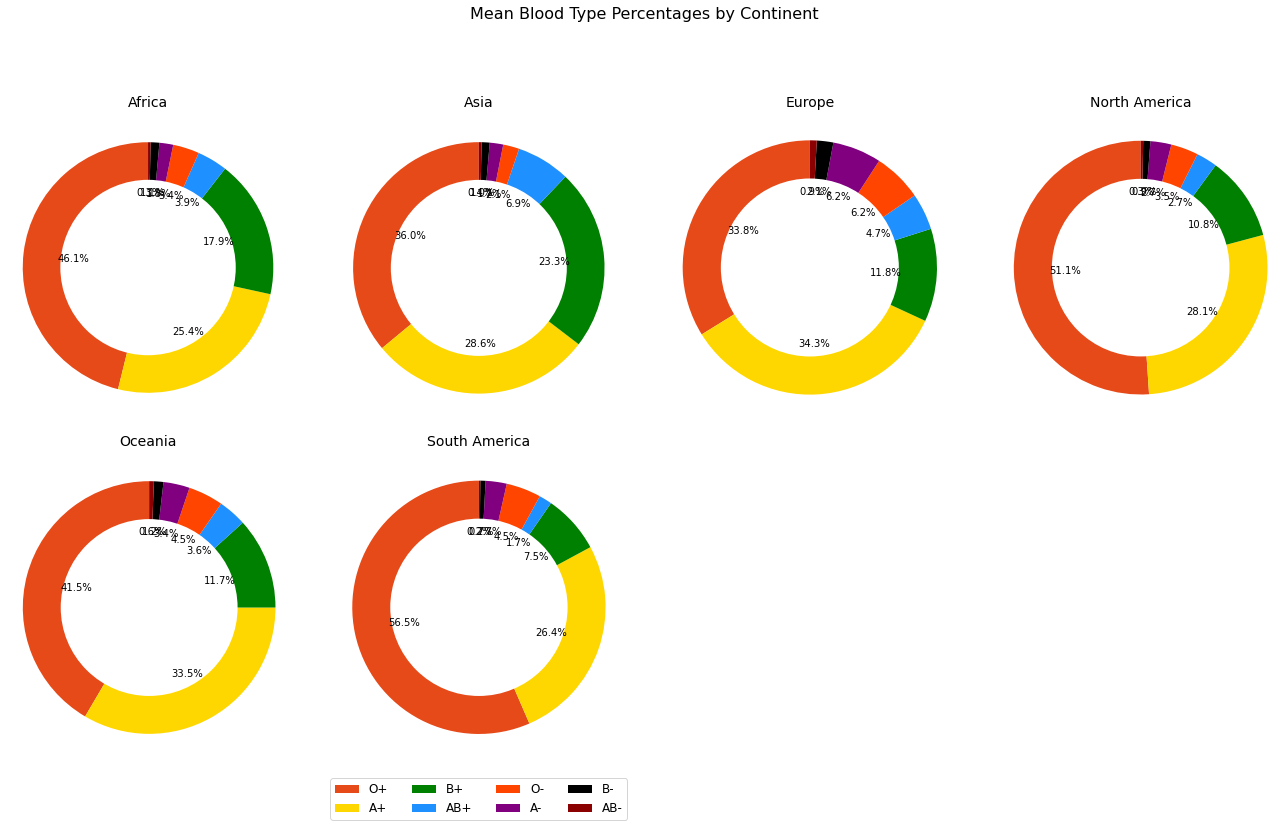

In [66]:
mean_blood_type_percentage = merged_df.groupby("continent")[mean_blood_type_cols].mean()

plt.figure(figsize=(18,12))

# List of colors for the blood type categories
colors = ['#E64A19', '#FFD700', '#008000', '#1E90FF', '#FF4500', '#800080', '#000000', '#8B0000']

for i , continent in enumerate(mean_blood_type_percentage.index):
    plt.subplot(2, 4, i+1)
    plt.pie(mean_blood_type_percentage.loc[continent], colors=colors, labels=None, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Create a white circle at the center to make it a donut chart
    plt.title(continent, fontsize=14)
    plt.axis('equal') # Equal aspect ratio ensures that the pie chart is drawn as a circle

# Add a common legend for all the donut charts
plt.legend(mean_blood_type_cols, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=12)
plt.suptitle('Mean Blood Type Percentages by Continent', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.92]) 
plt.show()

In [67]:
columns = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']

df_b["Common"] = df_b[columns].idxmax(axis=1)

df_b["Rare"]=df_b[columns].idxmin(axis=1)

df_b.head()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-,Common,Rare
0,Albania,3074579,34.1,31.20,14.5,5.20,6.0,5.50,2.6,0.90,O+,AB-
1,Algeria,43576691,40.0,30.00,15.0,4.25,6.6,2.30,1.1,0.75,O+,AB-
2,Argentina,45479118,48.9,31.54,8.0,2.45,4.9,3.16,0.8,0.25,O+,AB-
3,Armenia,3021324,29.0,46.30,12.0,5.60,2.0,3.70,1.0,0.40,A+,AB-
4,Australia,25466459,38.0,32.00,12.0,4.00,7.0,6.00,2.0,1.00,O+,AB-


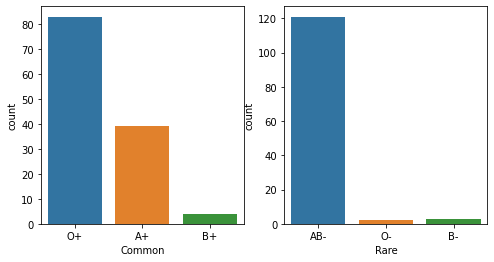

In [75]:
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);
sns.countplot(data=df_b['Country'], x=df_b['Common']);
plt.xticks(fontsize=10);

plt.subplot(1,2,2);
sns.countplot(data=df_b['Country'], x=df_b['Rare']);
plt.xticks(fontsize=10);

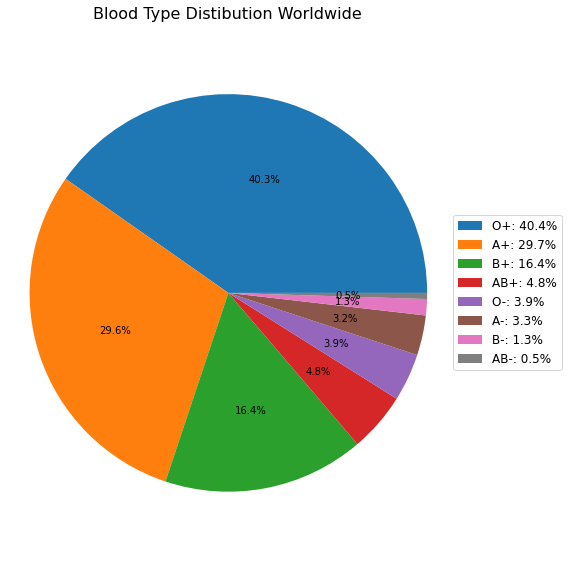

In [97]:
total_per = df_b[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].mean()

# Colors for the blood types
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

#creating the pie chart
plt.figure(figsize=(8,8))
plt.pie(total_per,labels=None,colors=colors,autopct="%1.1f%%")
plt.title("Blood Type Distibution Worldwide",fontsize=16)

blood_types = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']
legend_labels = [f'{blood_type}: {percentage:.1f}%' for blood_type, percentage in zip(blood_types, total_per)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

plt.axis('equal')
plt.tight_layout()
plt.show()

# Stacked Bar Chart
Finally, let's check the blood types for each continent. I chose the Stacked Bar Chart because in addition to having an idea of the difference in blood types for each continent separately, we can still see some similarities and differences between them.

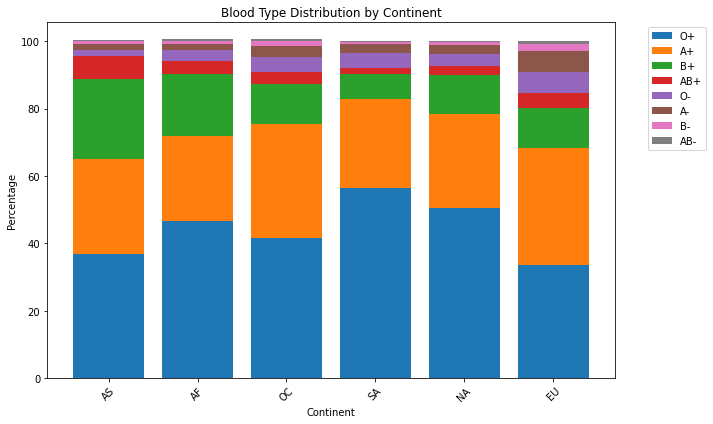

In [102]:
continents = ['AS', 'AF', 'OC', 'SA', 'NA', 'EU']

# Initialize a dictionary to store the aggregated blood type percentages for each continent
continent_data = {}
for continent in continents:
    # Filter the DataFrame for the current continent
    continent_df = df_b[df_b['Continent'] == continent]

    # Calculate the total percentage for each blood type in the continent
    total_percentage = continent_df[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].mean()
    continent_data[continent] = total_percentage.values.tolist()

# Transpose the data to correctly format the input for the Stacked Bar Chart
data_transposed = list(zip(*continent_data.values()))

# Create the Stacked Bar Chart
plt.figure(figsize=(10, 6))
bottom = None
for i, blood_type in enumerate(blood_types):
    plt.bar(continents, data_transposed[i], label=blood_type, bottom=bottom)
    if bottom is None:
        bottom = data_transposed[i]
    else:
        bottom = [sum(x) for x in zip(bottom, data_transposed[i])]

plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.title('Blood Type Distribution by Continent')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


# Choropleth Map
Let's visualize with geopandas the distribution of the predominant blood types across the world, using a world shapefile.

C:\Users\dell\AppData\Local\Temp/ipykernel_7472/4036786759.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


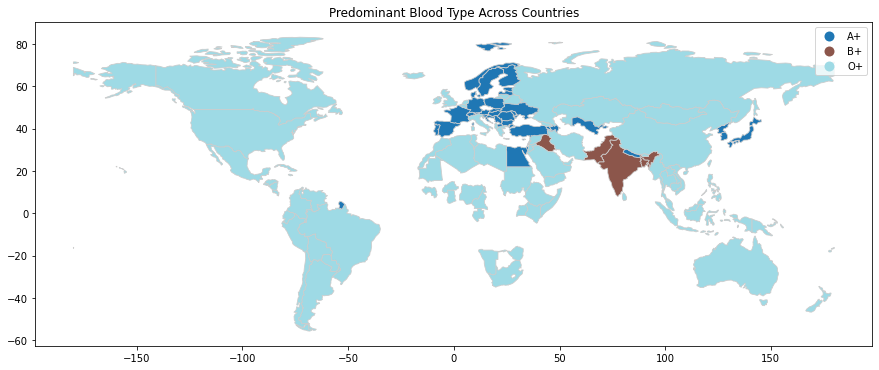

In [108]:
df_b['Country'] = df_b['Country'].str.strip()
df_b['Country'] = df_b['Country'].replace('United States', 'United States of America')

# Reading the shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
data = df_b[['Country', 'Predominant', 'Continent']]

# Merge the datasets based on the 'Country' column
merged_data = world.merge(df_b, left_on='name', right_on='Country', how='left')

# Plot the Choropleth Map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Predominant', cmap='tab20', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot title
ax.set_title('Predominant Blood Type Across Countries')
plt.show()